In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [12]:
df_skills = df.copy()
df_exploded = df.explode('job_skills')
skill_counts = df_exploded.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skill_counts.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [22]:
print(df_skills_count['job_title_short'].unique())

['Data Scientist' 'Data Engineer' 'Data Analyst' 'Senior Data Engineer'
 'Senior Data Scientist' 'Senior Data Analyst' 'Business Analyst'
 'Software Engineer' 'Machine Learning Engineer' 'Cloud Engineer']


In [13]:
job_titles = ['Data_Scientist', 'Data_Analyst', 'Data_Engineer']

In [21]:
print(df_skills_count['job_title_short'].unique())

['Data Scientist' 'Data Engineer' 'Data Analyst' 'Senior Data Engineer'
 'Senior Data Scientist' 'Senior Data Analyst' 'Business Analyst'
 'Software Engineer' 'Machine Learning Engineer' 'Cloud Engineer']


['Data Scientist' 'Data Engineer' 'Data Analyst' 'Senior Data Engineer'
 'Senior Data Scientist' 'Senior Data Analyst' 'Business Analyst'
 'Software Engineer' 'Machine Learning Engineer' 'Cloud Engineer']


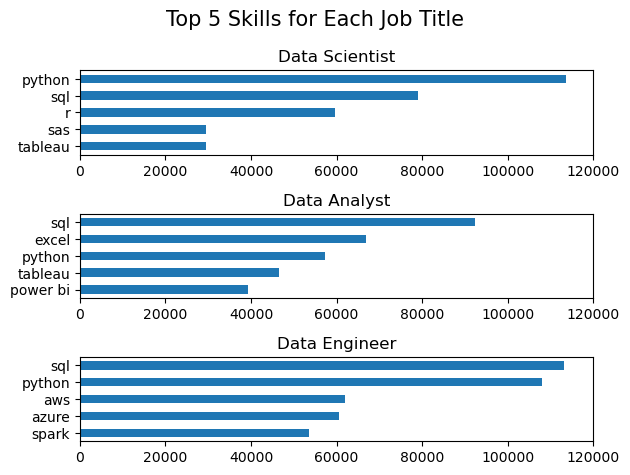

In [32]:
# Check available job titles
print(df_skills_count['job_title_short'].unique())

# Update job_titles to match actual values
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']  # Example, use actual values from print above

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    if not df_plot.empty:
        df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job_title)
        ax[i].invert_yaxis()
        ax[i].set_ylabel('')
        ax[i].legend().remove()
        ax[i].set_xlim(0, 120000)

fig.suptitle('Top 5 Skills for Each Job Title', fontsize=15)
fig.tight_layout()